In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices



In [2]:
url = "dataset//winequality-red.csv"
wine = pd.read_csv(url, sep=";")
wine.head(n=6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine2 = pd.read_csv(url, sep=";")
wine2['quality']=wine2['quality'].replace([3,4,5,6,7,8],[0,0,0,1,1,1])
wine2.head(n=6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [4]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
wine.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

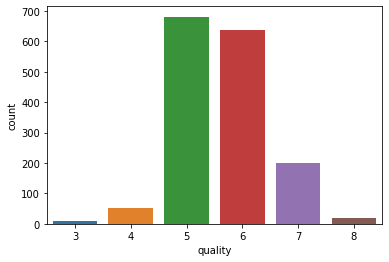

In [7]:
sns.countplot(x='quality', data=wine)
title="E:\\COMP551\\project1\\pic\\"
plt.savefig(title + "quality_distribution.png")

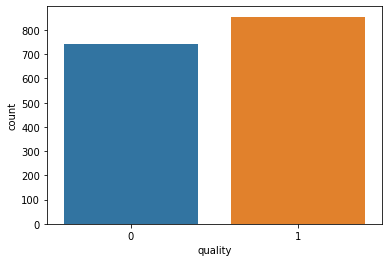

In [8]:
sns.countplot(x='quality', data=wine2)
plt.savefig(title + "class_distribution.png")

In [9]:
conditions = [
    (wine['quality'] >= 6),
    (wine['quality'] <= 5)
]
rating = [1, 0]
wine['rating'] = np.select(conditions, rating)
wine.rating.value_counts()

1    855
0    744
Name: rating, dtype: int64

In [10]:
wine.groupby('rating').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
0,8.142204,0.589503,0.237755,2.542070,0.092989,16.567204,54.645161,0.997068,3.311653,0.618535,9.926478,4.901882
1,8.474035,0.474146,0.299883,2.535965,0.082661,15.272515,39.352047,0.996467,3.310643,0.692620,10.855029,6.274854


# Corelation between features:


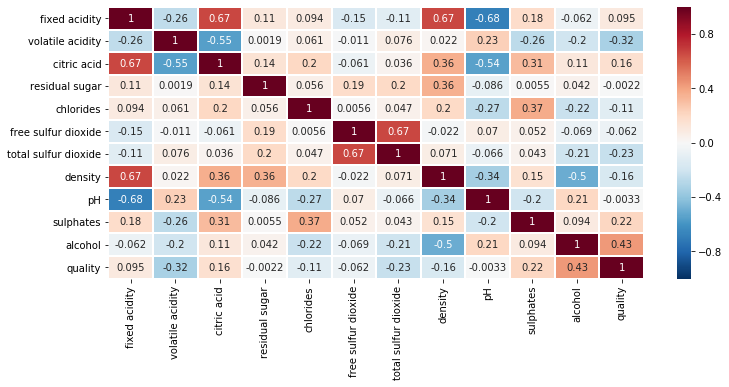

In [11]:
correlation = wine2.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True,linewidths=1, vmin=-1,cmap="RdBu_r")
plt.savefig(title + "features_correlation.jpg")

In [12]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.434751
sulphates               0.218072
citric acid             0.159129
fixed acidity           0.095093
residual sugar         -0.002160
pH                     -0.003264
free sulfur dioxide    -0.061757
chlorides              -0.109494
density                -0.159110
total sulfur dioxide   -0.231963
volatile acidity       -0.321441
Name: quality, dtype: float64

Analyzing the influences of alcohol, sulphates, citric acid, fixed acidity on wine quality

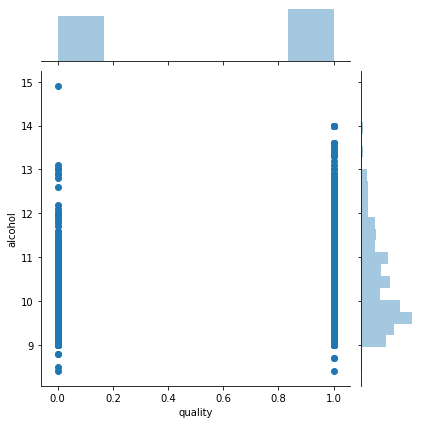

In [13]:
alc_qua = sns.jointplot("quality", 'alcohol',wine2)

plt.savefig(title + "quality_alcohol.png")
plt.show()

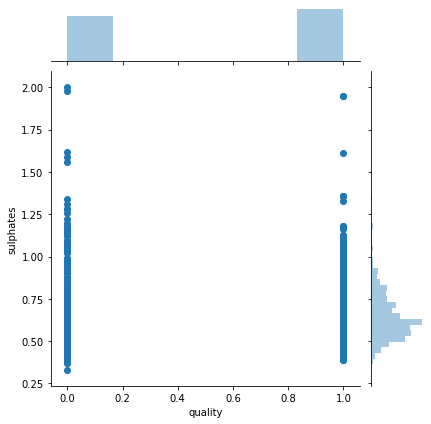

In [14]:
sul_qua = sns.jointplot("quality", 'sulphates',wine2)
plt.savefig(title + "quality_sulphates.png")
plt.show()

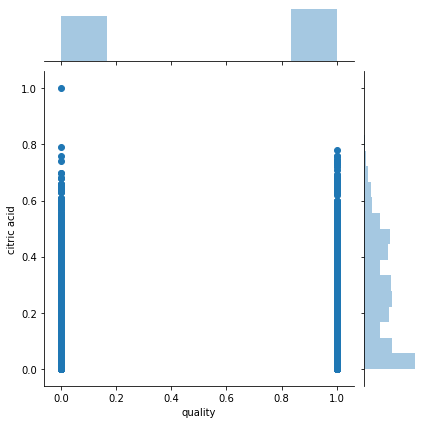

In [15]:
cit_qua = sns.jointplot("quality", 'citric acid',wine2)
plt.savefig(title + "quality_citric acid.png")
plt.show()

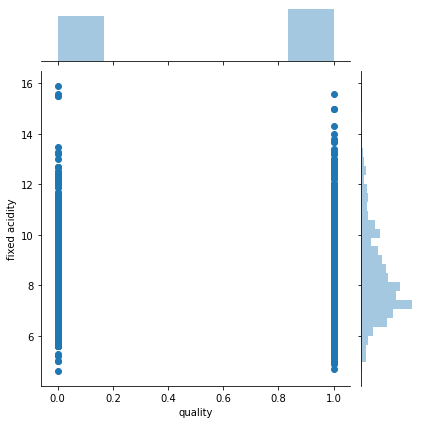

In [16]:
fix_qua = sns.jointplot("quality", 'fixed acidity',wine2)
plt.savefig(title + "quality_fixed acidity.png")
plt.show()

Analysing influences of other features on wine quality

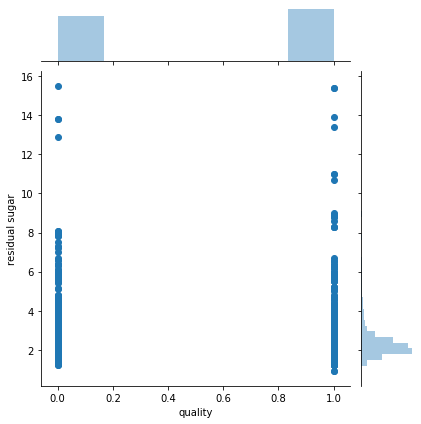

In [17]:
res_qua = sns.jointplot("quality", 'residual sugar',wine2)
plt.savefig(title + "quality_residual sugar.png")
plt.show()

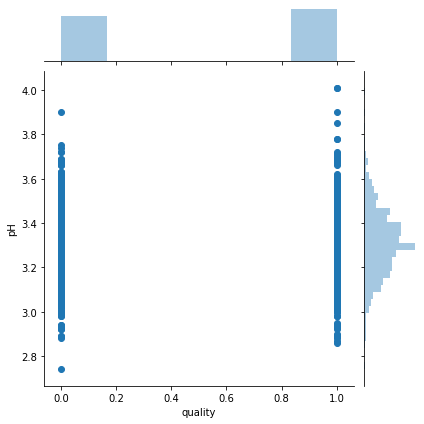

In [18]:
pH_qua = sns.jointplot("quality", 'pH',wine2)
plt.savefig(title + "quality_pH.png")
plt.show()

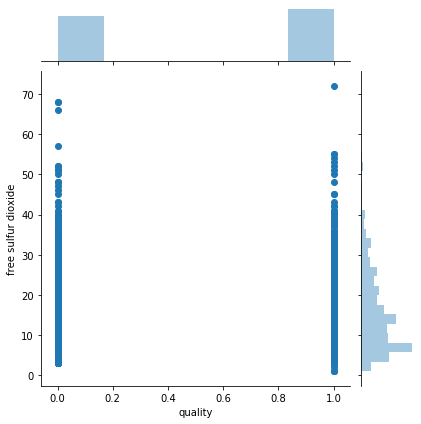

In [19]:
free_qua = sns.jointplot("quality", 'free sulfur dioxide',wine2)
plt.savefig(title + "quality_free sulfur dioxide.png")
plt.show()

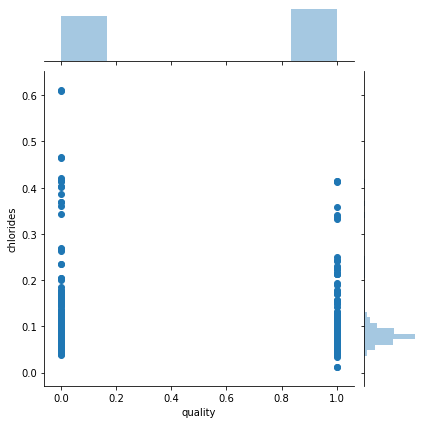

In [20]:
chl_qua = sns.jointplot("quality", 'chlorides',wine2)
plt.savefig(title + "quality_chlorides.png")
plt.show()

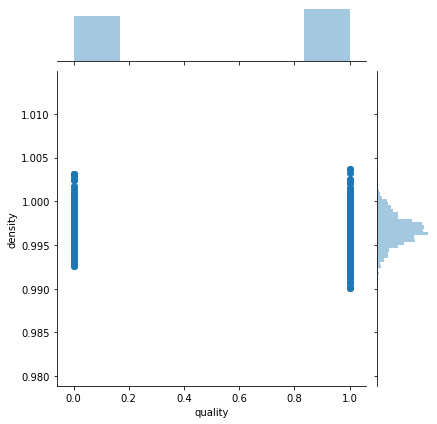

In [21]:
den = sns.jointplot("quality", 'density',wine2)
plt.savefig(title + "quality_density.png")
plt.show()

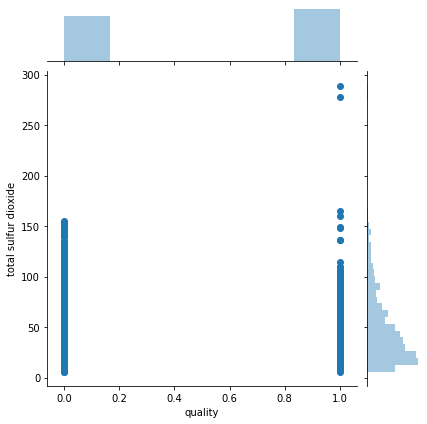

In [22]:
total_qua = sns.jointplot("quality", 'total sulfur dioxide',wine2)
plt.savefig(title + "quality_total sulfur dioxide.png")
plt.show()

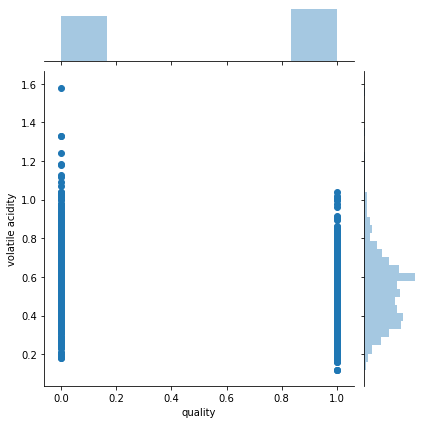

In [23]:
vol_qua = sns.jointplot("quality", 'volatile acidity',wine2)
plt.savefig(title + "quality_volatile acidity.png")
plt.show()